## LUẬT KẾT HỢP

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
data = pd.read_csv("E:/DA/DO_AN_CUOI_KY/DATASET/weatherUS_final.csv")
# data.head(5)
data.sample(5)

,Date,Month,Year,Location,Region,Season,MinTemp,MaxTemp,Rainfall,Sunshine,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
49681,2012-07-17,7,2012,Ballarat,Southeast,Winter,5.3,12.1,0.0,7.641785,...,22.000000,44.000000,98.0,62.0,1021.900000,1017.600000,7.4,11.6,No,Yes
40550,2009-09-20,9,2009,Canberra,Southeast,Spring,3.7,22.6,0.0,7.641785,...,14.057503,18.696043,63.0,37.0,1017.642104,1015.263738,13.8,20.4,No,No
112920,2012-03-09,3,2012,Walpole,West,Autumn,13.8,29.3,0.0,7.641785,...,17.000000,22.000000,64.0,51.0,1019.000000,1013.000000,19.4,26.9,No,No
46567,2011-07-05,7,2011,MountGinini,Southeast,Winter,-3.4,-2.1,14.6,7.641785,...,26.000000,39.000000,99.0,99.0,1017.642104,1015.263738,-2.9,-2.7,Yes,Yes
56153,2016-08-11,8,2016,Sale,Southeast,Winter,4.7,14.0,1.4,7.641785,...,13.000000,28.000000,68.0,59.0,1016.700000,1017.500000,10.5,13.0,Yes,No


### 1. Quy luật mùa và mưa

Tỷ lệ mưa theo mùa:
RainTomorrow        No       Yes
Season                          
Autumn        0.778149  0.221851
Dry           0.951250  0.048750
Spring        0.788480  0.211520
Summer        0.815087  0.184913
Wet           0.746152  0.253848
Winter        0.726792  0.273208


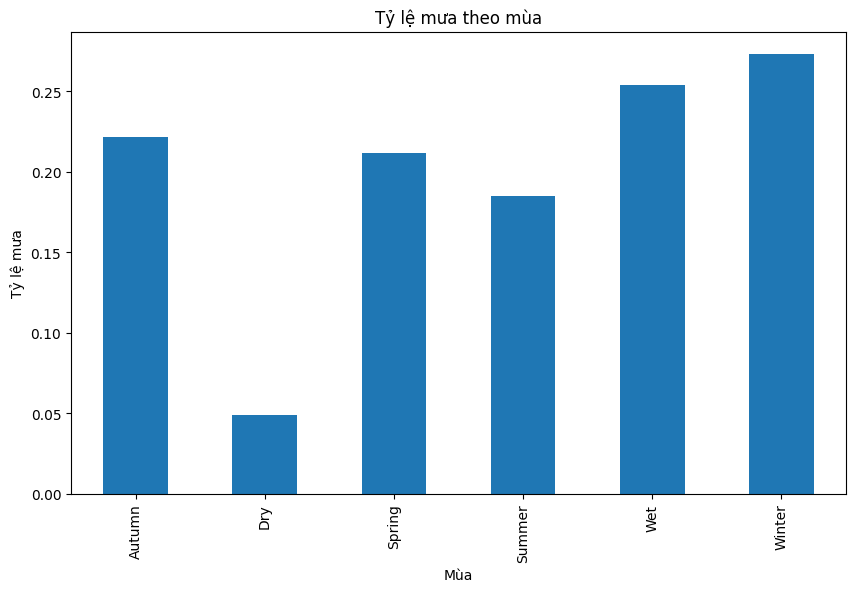


Mối quan hệ giữa mưa hôm nay và ngày mai:
RainTomorrow        No       Yes
RainToday                       
No            0.846867  0.153133
Yes           0.546456  0.453544


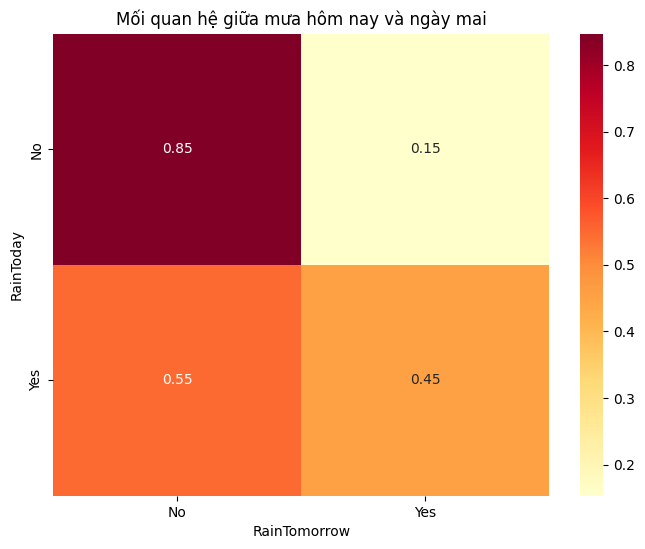


Top 5 luật kết hợp mạnh nhất:
                         antecedents        consequents  antecedent support  \
12  (RainTomorrow_No, Season_Summer)     (RainToday_No)            0.186776   
13     (RainToday_No, Season_Summer)  (RainTomorrow_No)            0.186815   
15  (RainTomorrow_No, Season_Autumn)     (RainToday_No)            0.192047   
8                  (RainTomorrow_No)     (RainToday_No)            0.781487   
9                     (RainToday_No)  (RainTomorrow_No)            0.782367   

    consequent support   support  confidence      lift  leverage  conviction  \
12            0.782367  0.162382    0.869393  1.111234  0.016254    1.666317   
13            0.781487  0.162382    0.869212  1.112253  0.016388    1.670736   
15            0.782367  0.162888    0.848165  1.084101  0.012636    1.433354   
8             0.782367  0.662561    0.847820  1.083660  0.051150    1.430101   
9             0.781487  0.662561    0.846867  1.083660  0.051150    1.426942   

    zhangs_me

c:\Users\panh2\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [3]:
# 1. Đầu tiên phân tích mối quan hệ giữa Mùa và Mưa
# Tính tỷ lệ mưa theo mùa
season_rain = data.groupby('Season')['RainTomorrow'].value_counts(normalize=True).unstack()
print("Tỷ lệ mưa theo mùa:")
print(season_rain)

# Visualize kết quả
plt.figure(figsize=(10, 6))
season_rain['Yes'].plot(kind='bar')
plt.title('Tỷ lệ mưa theo mùa')
plt.xlabel('Mùa')
plt.ylabel('Tỷ lệ mưa')
plt.show()

# 2. Phân tích mối quan hệ giữa mưa hôm nay và ngày mai
rain_relation = pd.crosstab(data['RainToday'], data['RainTomorrow'], normalize='index')
print("\nMối quan hệ giữa mưa hôm nay và ngày mai:")
print(rain_relation)

# Visualize mối quan hệ
plt.figure(figsize=(8, 6))
sns.heatmap(rain_relation, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Mối quan hệ giữa mưa hôm nay và ngày mai')
plt.show()

# 3. Áp dụng luật kết hợp
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Tạo DataFrame cho luật kết hợp
df_rules = data[['Season', 'RainToday', 'RainTomorrow']].copy()

# Encode dữ liệu
def encode_data(df):
    result = pd.DataFrame()
    for column in df.columns:
        for value in df[column].unique():
            result[f'{column}_{value}'] = (df[column] == value).astype(int)
    return result

df_encoded = encode_data(df_rules)

# Tìm frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Tạo luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# In ra top 5 luật có confidence cao nhất
print("\nTop 5 luật kết hợp mạnh nhất:")
print(rules.head())

In [4]:
# Phân tích chi tiết theo mùa
season_stats = data.groupby('Season').agg({
    'RainTomorrow': ['count', lambda x: (x == 'Yes').mean()]
}).round(3)

season_stats.columns = ['Số quan sát', 'Tỷ lệ mưa']
print("\nThống kê chi tiết theo mùa:")
print(season_stats.sort_values('Tỷ lệ mưa', ascending=False))


Thống kê chi tiết theo mùa:
        Số quan sát  Tỷ lệ mưa
Season                        
Winter        30065      0.273
Wet            3703      0.254
Autumn        31697      0.222
Spring        29496      0.212
Summer        29430      0.185
Dry            4041      0.049


### 2. RainToday + Region → RainTomorrow

c:\Users\panh2\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 10 luật kết hợp mạnh nhất cho RainToday + Region → RainTomorrow:
                          antecedents         consequents   support  \
41       (RainToday_No, Region_North)   (RainTomorrow_No)  0.047348   
34       (RainToday_No, Region_South)   (RainTomorrow_No)  0.057299   
37        (Region_West, RainToday_No)   (RainTomorrow_No)  0.094104   
21   (Region_Southeast, RainToday_No)   (RainTomorrow_No)  0.393998   
30        (Region_East, RainToday_No)   (RainTomorrow_No)  0.069811   
43  (Region_Southeast, RainToday_Yes)   (RainTomorrow_No)  0.075908   
52       (Region_West, RainToday_Yes)   (RainTomorrow_No)  0.016499   
49       (Region_East, RainToday_Yes)   (RainTomorrow_No)  0.013517   
51       (Region_East, RainToday_Yes)  (RainTomorrow_Yes)  0.013346   
54       (Region_West, RainToday_Yes)  (RainTomorrow_Yes)  0.015837   

    confidence      lift  
41    0.920666  1.178095  
34    0.868626  1.111503  
37    0.844230  1.080286  
21    0.838420  1.072851  
30    0.83529

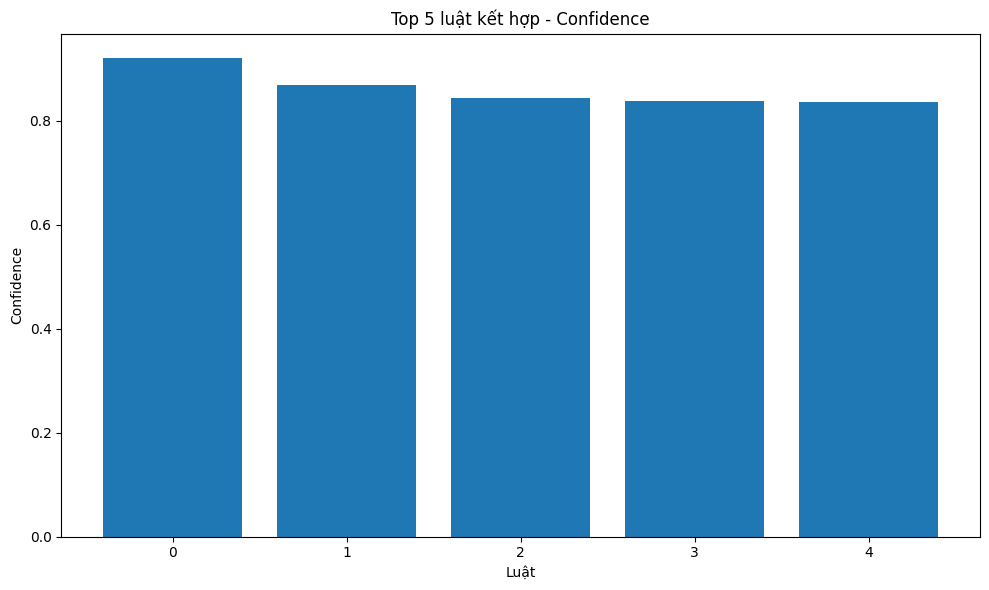

In [5]:
# 1. Tạo DataFrame cho luật kết hợp
df_rules = data[['RainToday', 'Region', 'RainTomorrow']].copy()

# 2. Encode dữ liệu
def encode_data(df):
    result = pd.DataFrame()
    for column in df.columns:
        for value in df[column].unique():
            result[f'{column}_{value}'] = (df[column] == value).astype(int)
    return result

df_encoded = encode_data(df_rules)

# 3. Tìm frequent itemsets với min_support thấp hơn để có nhiều luật hơn
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# 4. Tạo luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# 5. Lọc các luật có RainToday và Region trong antecedents và RainTomorrow trong consequents
filtered_rules = rules[
    rules['antecedents'].apply(lambda x: 'RainToday' in str(x) and 'Region' in str(x)) &
    rules['consequents'].apply(lambda x: 'RainTomorrow' in str(x))
]

# 6. Sắp xếp theo confidence và lift
filtered_rules = filtered_rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# 7. Hiển thị kết quả
print("\nTop 10 luật kết hợp mạnh nhất cho RainToday + Region → RainTomorrow:")
pd.set_option('display.max_columns', None)
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# 8. Visualize top 5 luật
plt.figure(figsize=(10, 6))
plt.bar(range(5), filtered_rules['confidence'].head(5))
plt.title('Top 5 luật kết hợp - Confidence')
plt.xlabel('Luật')
plt.ylabel('Confidence')
plt.tight_layout()
plt.show()

### 3. RainToday + Humidity → RainTomorrow

c:\Users\panh2\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Top 10 luật kết hợp mạnh nhất cho RainToday + Humidity → RainTomorrow:
                                           antecedents        consequents  \
200  (Humidity3pm_Cat_Low, Humidity9am_Cat_Low, Rai...  (RainTomorrow_No)   
85                 (Humidity3pm_Cat_Low, RainToday_No)  (RainTomorrow_No)   
174  (Humidity3pm_Cat_Low, Humidity9am_Cat_Medium, ...  (RainTomorrow_No)   
223  (Humidity3pm_Cat_Low, Humidity9am_Cat_High, Ra...  (RainTomorrow_No)   
68                 (Humidity9am_Cat_Low, RainToday_No)  (RainTomorrow_No)   
126               (Humidity3pm_Cat_Low, RainToday_Yes)  (RainTomorrow_No)   
239  (Humidity3pm_Cat_Medium, Humidity9am_Cat_High,...  (RainTomorrow_No)   
220  (Humidity9am_Cat_Low, Humidity3pm_Cat_Medium, ...  (RainTomorrow_No)   
100             (Humidity3pm_Cat_Medium, RainToday_No)  (RainTomorrow_No)   
189  (Humidity3pm_Cat_Medium, Humidity9am_Cat_Mediu...  (RainTomorrow_No)   

      support  confidence      lift  
200  0.199172    0.939026  1.201588  
85  

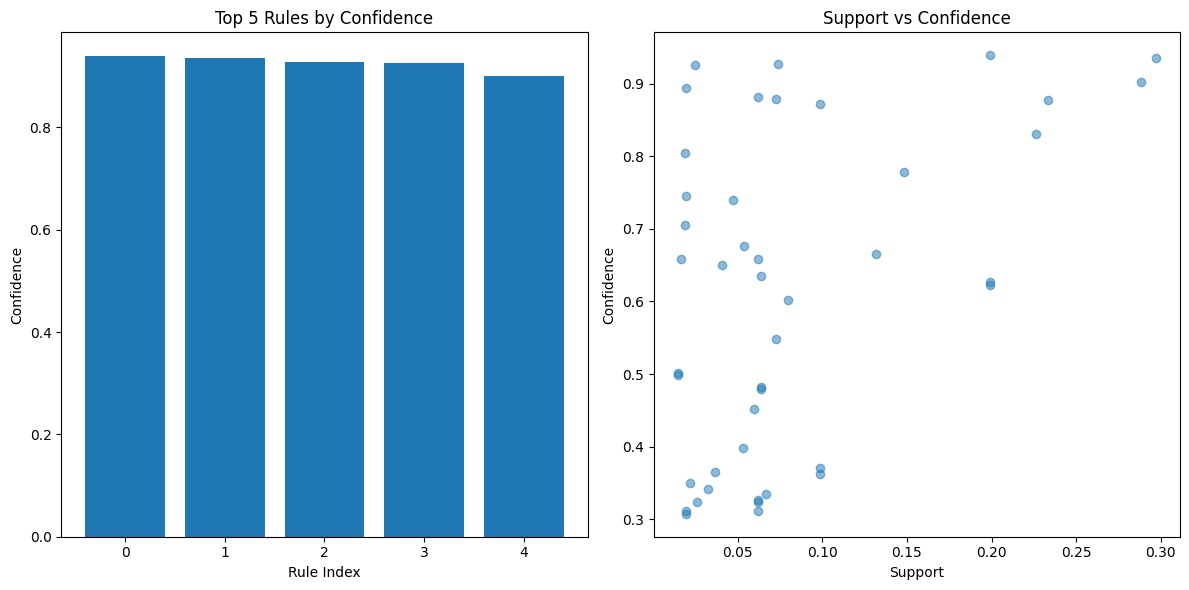


Phân tích chi tiết theo độ ẩm buổi sáng:
RainTomorrow                     No       Yes
Humidity9am_Cat RainToday                    
Low             No         0.901573  0.098427
                Yes        0.805082  0.194918
Medium          No         0.830834  0.169166
                Yes        0.649857  0.350143
High            No         0.777909  0.222091
                Yes        0.451710  0.548290


C:\Users\panh2\AppData\Local\Temp\ipykernel_8348\862835611.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  humidity_analysis = data.groupby(['Humidity9am_Cat', 'RainToday'])['RainTomorrow'].value_counts(normalize=True).unstack()


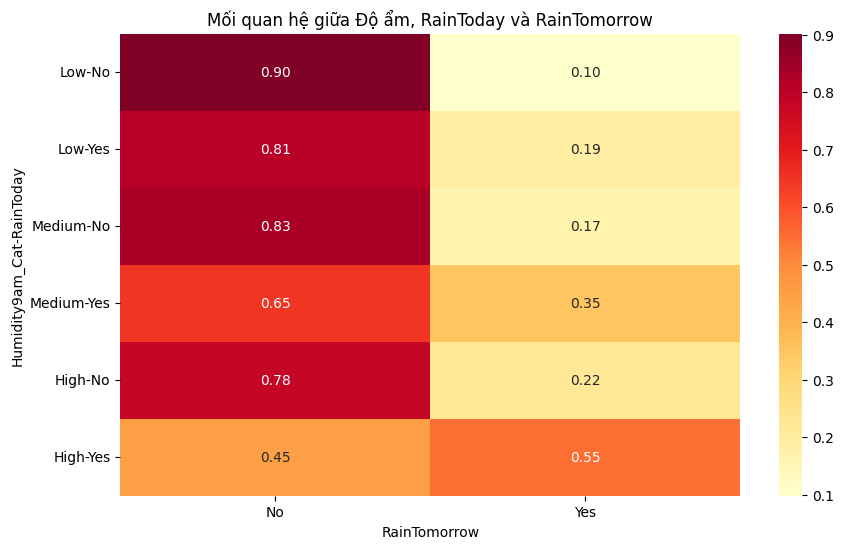

In [6]:
# 1. Rời rạc hóa độ ẩm và tạo DataFrame
def analyze_humidity_rain_rules(data):
    # Tạo categories cho độ ẩm buổi sáng và chiều
    data['Humidity9am_Cat'] = pd.qcut(data['Humidity9am'], q=3, labels=['Low', 'Medium', 'High'])
    data['Humidity3pm_Cat'] = pd.qcut(data['Humidity3pm'], q=3, labels=['Low', 'Medium', 'High'])
    
    # Tạo DataFrame cho luật kết hợp
    df_rules = data[[
        'RainToday',
        'Humidity9am_Cat',
        'Humidity3pm_Cat',
        'RainTomorrow'
    ]].copy()
    
    # Encode dữ liệu
    df_encoded = encode_data(df_rules)
    
    # Tìm frequent itemsets
    frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
    
    # Tạo luật kết hợp
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
    
    # Lọc các luật có RainToday và Humidity trong antecedents và RainTomorrow trong consequents
    filtered_rules = rules[
        rules['antecedents'].apply(lambda x: 'RainToday' in str(x) and 'Humidity' in str(x)) &
        rules['consequents'].apply(lambda x: 'RainTomorrow' in str(x))
    ]
    
    # Sắp xếp theo confidence và lift
    filtered_rules = filtered_rules.sort_values(['confidence', 'lift'], ascending=[False, False])
    
    return filtered_rules

# Thực hiện phân tích
humidity_rules = analyze_humidity_rain_rules(data)

# Hiển thị kết quả
print("\nTop 10 luật kết hợp mạnh nhất cho RainToday + Humidity → RainTomorrow:")
print(humidity_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Visualize kết quả
plt.figure(figsize=(12, 6))

# Plot 1: Top 5 rules by confidence
plt.subplot(1, 2, 1)
plt.bar(range(5), humidity_rules['confidence'].head())
plt.title('Top 5 Rules by Confidence')
plt.xlabel('Rule Index')
plt.ylabel('Confidence')

# Plot 2: Support vs Confidence scatter plot
plt.subplot(1, 2, 2)
plt.scatter(humidity_rules['support'], humidity_rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')

plt.tight_layout()
plt.show()

# Phân tích chi tiết theo độ ẩm
humidity_analysis = data.groupby(['Humidity9am_Cat', 'RainToday'])['RainTomorrow'].value_counts(normalize=True).unstack()
print("\nPhân tích chi tiết theo độ ẩm buổi sáng:")
print(humidity_analysis)

# Tạo heatmap để visualize mối quan hệ
plt.figure(figsize=(10, 6))
sns.heatmap(humidity_analysis, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Mối quan hệ giữa Độ ẩm, RainToday và RainTomorrow')
plt.show()